# Random Forest con regresión
El objetivo es clasificar la calidad el vino en función de las características.
Cada árbol se entrena con todos los ejemplos pero con un subconjunto de atributos

### Carga de datos

In [88]:
import pandas as pd

csv = './data/winequality-red.csv'
data = pd.read_csv(csv)
df_wines = pd.DataFrame(data)
print(df_wines.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

### Análisis exploratorio para visualizar la distribución de las clases

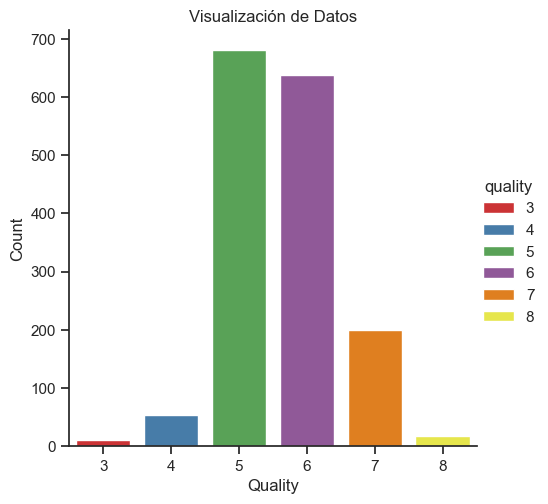

Instancias por clase
quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


In [89]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style='ticks') # line stlye
# kind='count' = amount of ocurrences of each class
sns.catplot(x='quality', data=df_wines, kind='count', hue='quality', palette='Set1')
plt.title("Visualización de Datos")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()
print('Instancias por clase')
print(df_wines.groupby('quality').size())

### Gráfico de dispersión

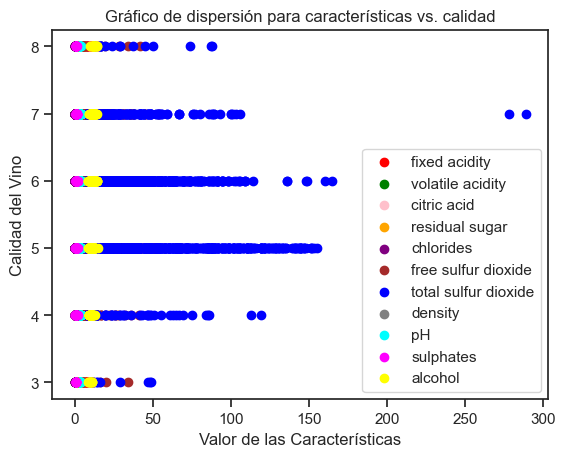

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

columns_for_scatter = df_wines.columns[:-1]

colors = ['red', 'green', 'pink', 'orange', 'purple', 'brown', 'blue', 'gray', 'cyan', 'magenta', 'yellow']
for i, column in enumerate(columns_for_scatter):
    plt.scatter(df_wines[column], df_wines['quality'], c=colors[i], label=column)

plt.xlabel('Valor de las Características')
plt.ylabel('Calidad del Vino')
plt.title('Gráfico de dispersión para características vs. calidad')

plt.legend()
plt.show()


### Selección de la variables más correlacionadas con la variable de salida

In [91]:
# Get correlations
correlation_matrix = df_wines.corr()

# Compare with target and sort them
correlation = correlation_matrix['quality']
sorted_correlations = correlation.sort_values(ascending=False)

print(sorted_correlations)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


### Preparación de los datos para el entrenamiento

In [92]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_wines, test_size=0.2, random_state=42)

# Reset index to maintain an order
# train.reset_index(inplace = True)
# test.reset_index(inplace = True)
train.reset_index(drop = True, inplace = True)
test.reset_index(drop = True, inplace = True)

print("\nConjunto de entrenamiento:")
print('-'*35)
print(train.head())

print("\nConjunto de prueba:")
print('-'*35)
print(test.head())


Conjunto de entrenamiento:
-----------------------------------
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            8.7             0.690         0.31             3.0      0.086   
1            6.1             0.210         0.40             1.4      0.066   
2           10.9             0.390         0.47             1.8      0.118   
3            8.8             0.685         0.26             1.6      0.088   
4            8.4             1.035         0.15             6.0      0.073   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 23.0                  81.0  1.00020  3.48       0.74   
1                 40.5                 165.0  0.99120  3.25       0.59   
2                  6.0                  14.0  0.99820  3.30       0.75   
3                 16.0                  23.0  0.99694  3.32       0.47   
4                 11.0                  54.0  0.99900  3.37       0.49   

   alcohol  quality  


### Parametrización
Optimización de los estimadores. En este caso potencias de 2


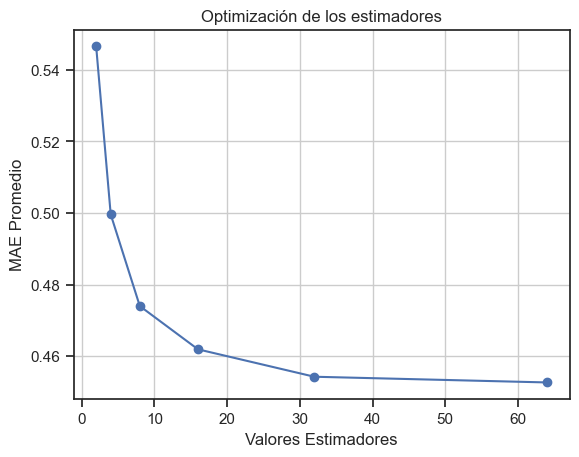

Mejor estimador: 64 - Error medio: 0.45


In [93]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

cv = KFold(n_splits=4)

l_estimators = [2, 4, 8, 16, 32, 64]

total_scores = []

for estimators in l_estimators:
    fold_accuracy = []
    regressor_model =  RandomForestRegressor(n_estimators= estimators, criterion='absolute_error', random_state=0)
    
    for train_fold, test_fold in cv.split(train):
    
        f_train = train.loc[train_fold]
        f_test = train.loc[test_fold]

        regressor_model.fit(
            X = f_train.drop(['quality'], axis=1), 
            y = f_train['quality']
                    )
        
        y_pred = regressor_model.predict(X = f_test.drop(['quality'], axis = 1))
        mae = mean_absolute_error(f_test['quality'], y_pred)
        fold_accuracy.append(mae)

    total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

# Visualization
plt.plot(l_estimators, total_scores, marker='o')
plt.title('Optimización de los estimadores')
plt.xlabel('Valores Estimadores')
plt.ylabel('MAE Promedio')
plt.grid(True)
plt.show()

# Results
best_est = l_estimators[np.argmin(total_scores)]
best_mae = min(total_scores)
print (f"Mejor estimador: {best_est} - Error medio: {best_mae:.2f}")


## Construcción con el mejor estimador y visualización

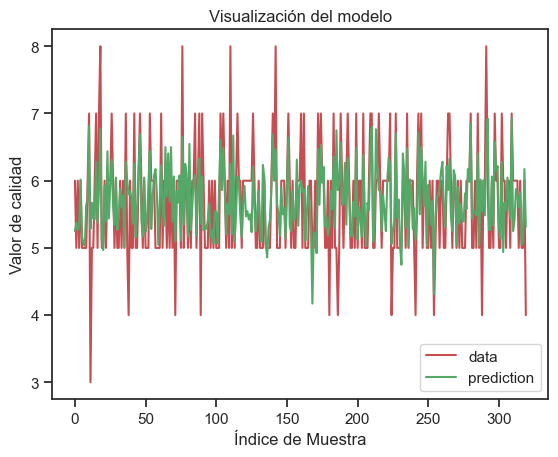

Mejor estimador: 64 - Error medio: 0.45


In [94]:
regressor_model =  RandomForestRegressor(n_estimators= best_est, criterion='absolute_error', random_state=0)
regressor_model.fit( X = train.drop(['quality'], axis=1), y = train['quality'])
y_pred = regressor_model.predict(X = test.drop(['quality'], axis = 1))
mae = mean_absolute_error(test['quality'], y_pred) 

# Visualization
xx = np.arange(test['quality'].shape[0])
plt.plot(xx, test['quality'], c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title('Visualización del modelo')
plt.xlabel('Índice de Muestra')
plt.ylabel('Valor de calidad')
plt.show()

print(f"Mejor estimador: {best_est} - Error medio: {best_mae:.2f}") 



### Informe de variables

Informe de Importancia de las Variables:
                 Feature  Importance
10               alcohol    0.328353
1       volatile acidity    0.100473
9              sulphates    0.092479
6   total sulfur dioxide    0.082304
7                density    0.064340
3         residual sugar    0.063998
8                     pH    0.061178
4              chlorides    0.060141
0          fixed acidity    0.051121
2            citric acid    0.049738
5    free sulfur dioxide    0.045874


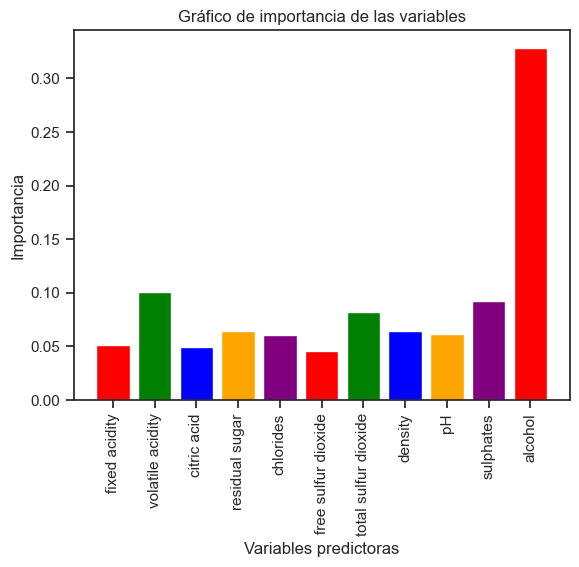

In [95]:
# Get importance
importances = regressor_model.feature_importances_

# Create dataframe
X_train = train.iloc[:, :-1]
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Exclude column 'index' if exists
if 'index' in feature_importance_df['Feature'].values:
    feature_importance_df = feature_importance_df[feature_importance_df['Feature'] != 'index']

# Order by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Informe de Importancia de las Variables:")
print(feature_importance_df)

# Gráfico de importancia de las variables
feature_names = df_wines.columns[:-1]
feature_importances = regressor_model.feature_importances_
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.bar(feature_names, feature_importances, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Variables predictoras')
plt.ylabel('Importancia')
plt.title('Gráfico de importancia de las variables')
plt.show()
